<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/Utils/Colab_25GBRAM_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memory Information

In [3]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
import numpy as np 
import pandas as pd 
from glob import glob

In [20]:
name_train1 = sorted(glob("./data/TRAIN/*"))
name_train2 = sorted(glob("./data/TRAIN2/*"))
# name_test = sorted(glob("./data/TEST/*"))

y_train = np.load("./data/y_train.npy")
print(len(name_train1))
print(len(name_train2))
print(len(y_train))

In [13]:
name_train1.extend(name_train2)
print(len(name_train1))

20000


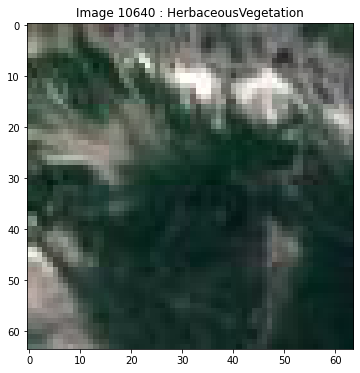

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

num = np.random.randint(len(name_train1))
plt.figure(figsize=(6, 6))
plt.title("Image {} : {}".format(num, y_train[num]))
plt.imshow(Image.open(name_train1[num]));

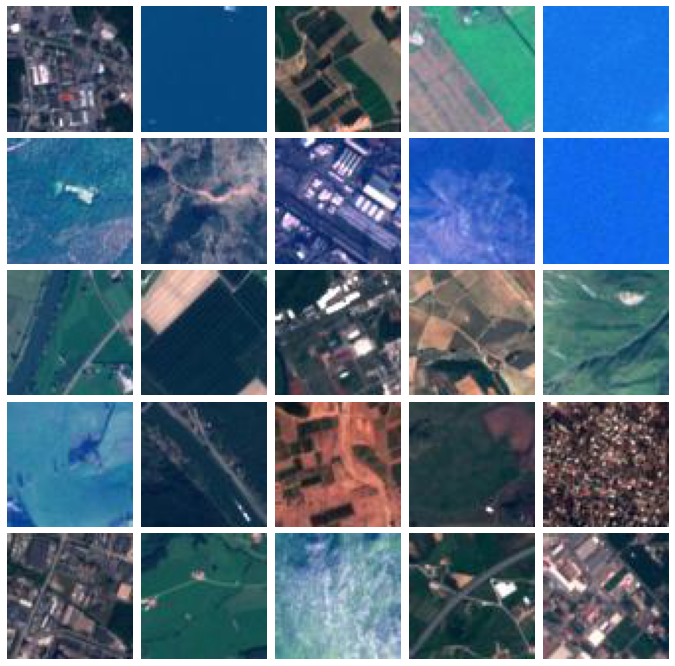

In [15]:
figure = plt.figure(figsize=(12, 12))
size = 5
grid = plt.GridSpec(size, size, hspace=0.05, wspace=0.0)

for line in range(size):
    for col in range(size):
        figure.add_subplot(grid[line, col])
        num = np.random.randint(len(name_train1))
        plt.imshow(Image.open(name_train1[num]))
        plt.axis('off')  

In [18]:
X_train = np.array([np.array(Image.open(jpg)) for jpg in name_train1])
# X_test = np.array([np.array(Image.open(jpg)) for jpg in name_test])


print (X_train.shape)
print (y_train.shape)

(20000, 64, 64, 3)
(20000, 10)


In [18]:
print (y_train[:30])

['Forest' 'PermanentCrop' 'HerbaceousVegetation' 'Pasture' 'Highway'
 'Forest' 'Residential' 'Residential' 'River' 'Pasture' 'Pasture'
 'Residential' 'PermanentCrop' 'Forest' 'HerbaceousVegetation'
 'Residential' 'SeaLake' 'SeaLake' 'Forest' 'HerbaceousVegetation'
 'Forest' 'Industrial' 'AnnualCrop' 'Industrial' 'Residential' 'SeaLake'
 'AnnualCrop' 'HerbaceousVegetation' 'Residential' 'PermanentCrop']


In [21]:
from sklearn.preprocessing import OneHotEncoder

print (f"Shape label raw : {y_train.shape}")

encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

print (f"Shape label One Hot Encoded : {y_train.shape}")
print (f"Label for y_train[0] : {y_train[3]}")

Shape label raw : (20000,)
Shape label One Hot Encoded : (20000, 10)
Label for y_train[0] : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
X_train, X_valid = X_train[:18000], X_train[18000:]
y_train, y_valid = y_train[:18000], y_train[18000:]

In [23]:
# X_valid = X_valid[:4500]
# y_valid = y_valid[:4500]
print(X_valid.shape)

(2000, 64, 64, 3)


In [24]:
X_train, X_valid = X_train/255, X_valid/255
# X_train, X_valid, X_test = X_train*255, X_valid*255, X_test*255

In [25]:
import keras 
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

Using TensorFlow backend.


In [26]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, batch_size = 128, 
                    epochs=28)

Epoch 1/28
18000/18000 [==============================] - 14s 757us/step - loss: 1.5930 - accuracy: 0.3803
Epoch 2/28
18000/18000 [==============================] - 7s 380us/step - loss: 1.0851 - accuracy: 0.6052
Epoch 3/28
18000/18000 [==============================] - 7s 380us/step - loss: 0.8681 - accuracy: 0.6876
Epoch 4/28
18000/18000 [==============================] - 7s 379us/step - loss: 0.7667 - accuracy: 0.7237
Epoch 5/28
18000/18000 [==============================] - 7s 380us/step - loss: 0.6774 - accuracy: 0.7578
Epoch 6/28
18000/18000 [==============================] - 7s 382us/step - loss: 0.6003 - accuracy: 0.7900
Epoch 7/28
18000/18000 [==============================] - 7s 380us/step - loss: 0.5457 - accuracy: 0.8070
Epoch 8/28
18000/18000 [==============================] - 7s 379us/step - loss: 0.4672 - accuracy: 0.8347
Epoch 9/28
18000/18000 [==============================] - 7s 380us/step - loss: 0.4407 - accuracy: 0.8464
Epoch 10/28
18000/18000 [====================

In [28]:
loss, metrics = model.evaluate(X_valid, y_valid)

print (metrics)

2000/2000 [==============================] - 0s 247us/step
0.8339999914169312


In [29]:
filepath = './saved_model'
save_model(model, filepath)

In [30]:
!ls

data  saved_model  testers  to_test


START RUNNING FROM HERE IF YOU WANT TO DIRECTLY ACCESS SAVED MODEL AND BEGIN TESTING

In [ ]:
filepath = './saved_model'
model = load_model(filepath, compile = True)

In [32]:
import cv2
img = cv2.imread('./data/agri1.jpg') #Replace this image here with the image you want to split into 64x64 sized tiles
for r in range(0,img.shape[0],64):
    for c in range(0,img.shape[1],64):
        cv2.imwrite(f"testers/img{r}_{c}.png",img[r:r+64, c:c+64,:])# enter the path u want to store these tiles

Here, make sure from the tiles created, choose n number of samples, and store them in a new folder called "to_test"

In [31]:
samples=sorted(glob("./to_test/*"))
print(samples)

['./to_test/Copy of img0_640.png', './to_test/Copy of img192_320.png', './to_test/Copy of img192_640.png', './to_test/Copy of img256_128.png', './to_test/Copy of img320_0.png']


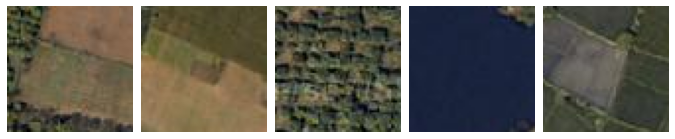

In [32]:
figure = plt.figure(figsize=(12, 12))
grid = plt.GridSpec(size, size, hspace=0.05, wspace=0.0)

for line in range(1):
    for col in range(5): # Replace 5 here with the n, which is the no of 64x64 images u chose to store inside "to_test" folder
        figure.add_subplot(grid[line, col])
        plt.imshow(Image.open(samples[col]))
        plt.axis('off')  

In [33]:
sample_imgs = np.array([np.array(Image.open(jpg)) for jpg in samples])
print(sample_imgs.shape)

(5, 64, 64, 3)


In [37]:
predictions = model.predict(sample_imgs)
# for i in predictions:
#     print(i)
classes = np.argmax(predictions, axis = 1)
print(classes)# Output will be numbers from 0-9, depicting the corresponding class to which the test image belongs to. Refer documentation to see classes and their values

[4 0 4 9 4]
